In [4]:
!pip install wfdb

   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   -------------------- ------------------- 0.5/1.0 MB 882.6 kB/s eta 0:00:01
   -------------------- ------------------- 0.5/1.0 MB 882.6 kB/s eta 0:00:01
   ------------------------------- -------- 0.8/1.0 MB 932.9 kB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 885.0 kB/s eta 0:00:00


In [6]:
!pip install heartpy

   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 4.7 MB/s eta 0:00:00


In [32]:
#модули, которые нам понадобятся
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import wfdb
import heartpy as hp
from scipy.signal import find_peaks

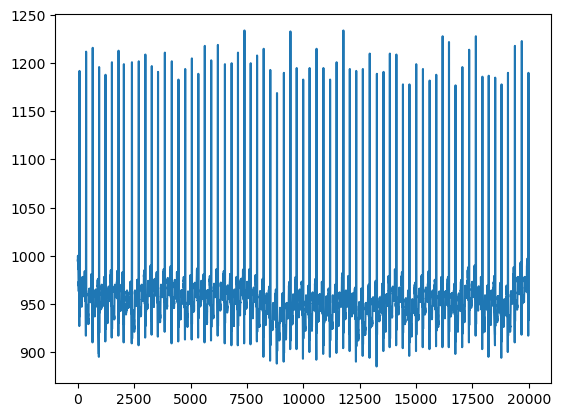

In [33]:
#загрузка сигнала из .csv файла с pandas
df = pd.read_csv("C:\\Users\\Rita\\Downloads\\ecg.csv")
plt.plot(df['MLII'])
plt.show()

In [71]:
class Experiment:
    def __init__(self, dict):
        self.date = dict["date"]
        self.path_signal = dict["signal"]
        self.parameters = dict["parameters"]
        
    def get_date(self):
        return self.date

    def get_signal_length(self):
        dlina = pd.read_csv(self.path_signal)
        return len(dlina)

    def plot_signal(self):
        grafic =  pd.read_csv(self.path_signal)
        plt.plot(df["MLII"])
        plt.show()

    def _signal_filtration(self, signal, filtration_parametres):
        filtered = hp.filter_signal(signal, **filtration_parametres)
        return filtered

    def _signal_find_peaks(self, signal, find_peaks_parametres):
        peaks, _ = find_peaks(signal, **find_peaks_parametres)
        return peaks

    def _calculate_RR_intervals(self):
        ecg = pd.read_csv(self.path_signal)
        filtered = self._signal_filtration(df['MLII'], self.parameters['filtration_parametres'])
        peaks = self._signal_find_peaks(filtered, self.parameters['find_peaks_parametres'])
        return list(peaks[1:]-peaks[0:-1])

    def get_RR_statistics(self):
        RRs = self._calculate_RR_intervals()
        RR_statistics = {}
        RR_statistics['mean'] = np.mean(RRs)
        RR_statistics['std'] = np.std(RRs)
        RR_statistics['min'] = np.min(RRs)
        RR_statistics['min'] = np.max(RRs)
        return RR_statistics

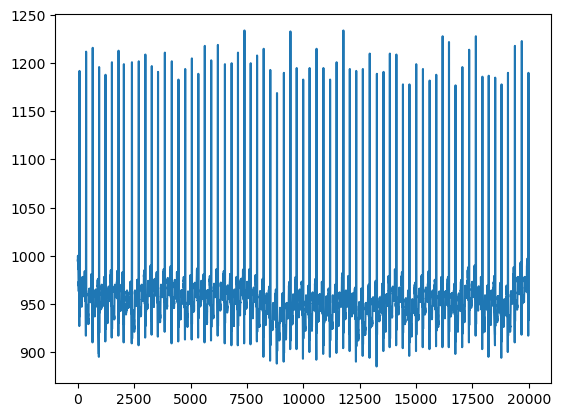

In [72]:
ecg = pd.read_csv("C:\\Users\\Rita\\Downloads\\ecg.csv")
plt.plot(df['MLII'])
plt.show()

In [73]:
ecg = Experiment({'date': '2023-01-05', 'signal': 'path_to_ecg_signal', 'parameters':{}})
ecg.get_date()

'2023-01-05'

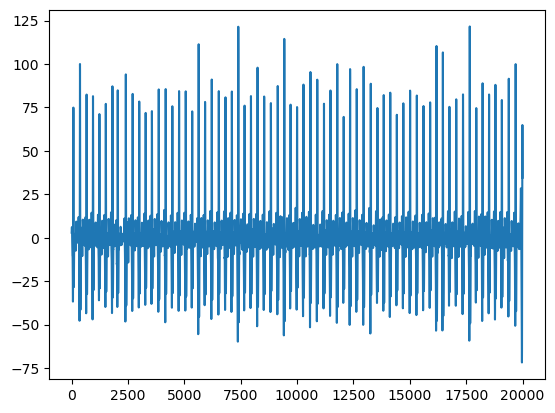

In [74]:
#фильтрация сигнала с библиотекой heartpy
filtered = hp.filter_signal(df['MLII'], cutoff = [0.75, 3.5], sample_rate = 100, order = 3, filtertype='bandpass')
plt.plot(filtered)
plt.show()

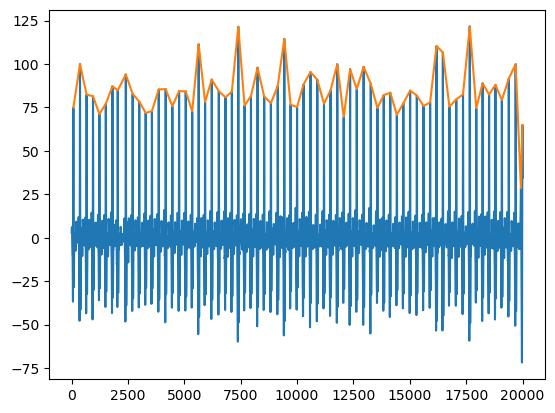

In [75]:
#поиск точек максимума с библиотекой scipy
peaks, _ = find_peaks(filtered, height=20)
plt.plot(filtered)
plt.plot(peaks, filtered[peaks])
plt.show()

2023-01-05
20000


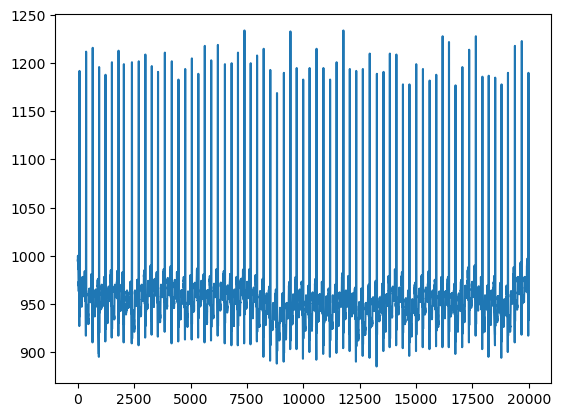

None
[293, 293, 284, 284, 284, 294, 236, 358, 303, 292, 285, 277, 303, 308, 295, 299, 295, 287, 287, 284, 296, 313, 297, 282, 285, 279, 283, 293, 293, 298, 304, 290, 279, 288, 284, 309, 303, 298, 288, 301, 285, 284, 295, 305, 317, 295, 280, 289, 292, 288, 300, 299, 297, 293, 283, 282, 290, 303, 300, 299, 290, 280, 287, 282, 285, 307, 305, 233, 66]
{'mean': 288.6231884057971, 'std': 31.077323597890175, 'min': 358}


In [76]:
experiment = Experiment(
    {'date': '2023-01-05',
      'signal': "C:\\Users\\Rita\\Downloads\\ecg.csv",
      'parameters': {'filtration_parametres': {'cutoff': [0.75, 3.5],
                                               'sample_rate': 100,
                                               'order': 3,
                                               'filtertype': 'bandpass'},
                     'find_peaks_parametres': {'height': 20}
                     }
    }
)

print(experiment.get_date())
print(experiment.get_signal_length())
print(experiment.plot_signal())
print(experiment._calculate_RR_intervals())
print(experiment.get_RR_statistics())